In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Подключаем нужные для работы с датафреймом библиотеки

# ШАГ 1

In [4]:
data = pd.read_csv('games.csv')
data.head(10)
#загружаем и печатаем данные на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В таблице представлены данные о прадажах игр а период 1980-2016 гг, также можно увидеть пропуски в данных

# Шаг 2

In [6]:
data.columns = map(str.lower, data.columns)
data.head()
#Приводим названия столбцов к нижнему регистру

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.info()
#Смотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

#Меняем тип данных столбца с временем года: приводим его к типу ,,дата и время,,
data.info()
#Проверяем проделанную работу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           0 non-null      float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 1.4+ MB


Проверяя таблицу я исправил тип данных столбца "year_of_release" с нецелочисленного типа на дату и время.

In [9]:
data.isna().sum()
#Посчитаем количество пропусков в таблице

name                   2
platform               0
year_of_release      269
genre                  2
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8578
user_score          9125
rating             16715
dtype: int64

In [10]:
data[data['name'].isna()]
#Проверил гипотезу, что 2 пропущенных значения жанра находятся в строках с пропущенным названием игры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Исправить пропуски в столбцах ,,название,, и ,,жанр,, не представляется возможным.

In [11]:
data.isna().sum()
#Заменяем пропуски в столбцах с оценками на медианное значение

name                   2
platform               0
year_of_release      269
genre                  2
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8578
user_score          9125
rating             16715
dtype: int64

In [13]:
sum_na = data['na_sales'].sum()
sum_eu = data['eu_sales'].sum()
sum_jp = data['jp_sales'].sum()
sum_other = data['other_sales'].sum()

sales = [['North America', sum_na],
           ['European Union', sum_eu],
           ['Japan', sum_jp],
           ['Other countries', sum_other]]
regions = ['region','sum of sales']

new_data = pd.DataFrame(data=sales, columns=regions)

new_data
#Посчитаем суммы продаж по регионам и создадим новую таблицу для представления данных

,region,sum of sales
0,North America,4402.35
1,European Union,2424.67
2,Japan,1297.37
3,Other countries,791.32


Пропуски в годе выпуска игры могли возникнуть из-за неивестности даты выхода игры, прпуски в рейтингах могли возникнуть потому что критик возможно не определился с оценкой, решил оставить пропуск. 

### Промежуточные выводы: Для начала я открыл файл с данными, изучил общую информацию о столбцах, их типах данных и исправил тип некоторых столбцов, потом уменьшил регистры в названиях столбцов, исправил пропуски, и создал новую таблицу для представления суммы продаж игр по регионам.

# Шаг 3

                 name  platform  genre  na_sales  eu_sales  jp_sales  \
year_of_release                                                        
1980-01-01          9         9      9         9         9         9   
1981-01-01         46        46     46        46        46        46   
1982-01-01         36        36     36        36        36        36   
1983-01-01         17        17     17        17        17        17   
1984-01-01         14        14     14        14        14        14   
1985-01-01         14        14     14        14        14        14   
1986-01-01         21        21     21        21        21        21   
1987-01-01         16        16     16        16        16        16   
1988-01-01         15        15     15        15        15        15   
1989-01-01         17        17     17        17        17        17   
1990-01-01         16        16     16        16        16        16   
1991-01-01         41        41     41        41        41      

<Axes: >

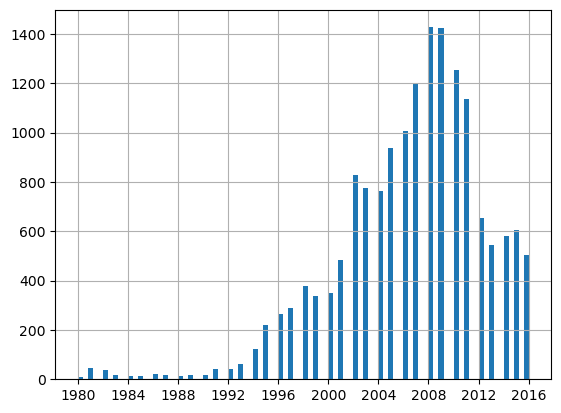

In [14]:
print(data.groupby('year_of_release').count())
data['year_of_release'].hist(bins=90)
#посчитаем количество выпущенных игр по годам

Исходя из данных таблицы можно сделать вывод что в период с 1980 по 2008 год количество выпущенных игр непрерывно росло, спад выпуска произошёл после 2009 года. Вполне вероятно, что на резкий спад выпуска игр повлиял мировой кризис 2008-2009 года.

In [15]:
plat_name = data.groupby('platform').count().sort_values(by='name', ascending=False)
plat_name
##посчитаем количество выпущенных игр по платформам

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
PS2,2161,2127,2161,2161,2161,2161,2161,1298,1241,0
DS,2151,2121,2151,2151,2151,2151,2151,717,516,0
PS3,1331,1306,1331,1331,1331,1331,1331,820,877,0
Wii,1320,1286,1320,1320,1320,1320,1320,585,560,0
X360,1262,1232,1262,1262,1262,1262,1262,916,966,0
PSP,1209,1193,1209,1209,1209,1209,1209,462,421,0
PS,1197,1190,1197,1197,1197,1197,1197,200,162,0
PC,974,957,974,974,974,974,974,715,770,0
XB,824,803,824,824,824,824,824,725,586,0


In [17]:
actual_table = data[(data['year_of_release'] == '2016') | (data['year_of_release'] == '2015') | (data['year_of_release'] == '2014')]
actual_table['genre_sales_1'] = actual_table['na_sales'] + actual_table['eu_sales'] + actual_table['jp_sales'] + actual_table['other_sales']
actual_table.head(10)
#Создадим актуальную таблицу за 2014-2016 года

C:\Users\User\AppData\Local\Temp\ipykernel_49468\394587284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_table['genre_sales_1'] = actual_table['na_sales'] + actual_table['eu_sales'] + actual_table['jp_sales'] + actual_table['other_sales']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_sales_1
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,NaN,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,NaN,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,NaN,7.66
94,FIFA 17,PS4,2016-01-01,Sports,0.66,5.75,0.08,1.11,85.0,5.0,NaN,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014-01-01,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015-01-01,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
105,Fallout 4,PS4,2015-01-01,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,NaN,7.17


In [18]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.groupby('platform')['total_sales'].agg(sum).sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

За актуальный период буду использовать 2016, 2015 и 2014 года.

In [19]:
plat = data[(data['year_of_release'] == '2016') | (data['year_of_release'] == '2015') | (data['year_of_release'] == '2014')]
plat.groupby('platform').count().sort_values(by='name', ascending=False)
#Найдём лидера продаж игр за 2014-2016 годы
#количество выпущенных игр

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
PS4,376,376,376,376,376,376,376,237,242,0,376
PSV,295,295,295,295,295,295,295,54,73,0,295
XOne,228,228,228,228,228,228,228,155,165,0,228
PS3,219,219,219,219,219,219,219,36,98,0,219
3DS,212,212,212,212,212,212,212,51,55,0,212
PC,151,151,151,151,151,151,151,116,122,0,151
X360,111,111,111,111,111,111,111,26,83,0,111
WiiU,73,73,73,73,73,73,73,43,48,0,73
PSP,13,13,13,13,13,13,13,0,0,0,13


Можно выделить наиболее потенциально прибыльные платформы: PS4, PSV и XOne.

In [20]:
plat_l = actual_table.groupby('platform').sum().sort_values(by='genre_sales_1', ascending=False)
plat_l

C:\Users\User\AppData\Local\Temp\ipykernel_49468\3183098321.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plat_l = actual_table.groupby('platform').sum().sort_values(by='genre_sales_1', ascending=False)


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,genre_sales_1
platform,,,,,,,,
PS4,98.61,130.04,15.02,44.48,17103.0,1652.4,0.0,288.15
XOne,81.27,46.25,0.32,12.52,11438.0,1088.1,0.0,140.36
3DS,22.64,16.12,44.24,3.68,3518.0,392.6,0.0,86.68
PS3,22.05,25.54,11.22,9.37,2396.0,589.4,0.0,68.18
X360,28.30,15.49,0.08,4.35,1657.0,479.0,0.0,48.22
WiiU,19.36,13.15,7.31,3.16,3061.0,340.2,0.0,42.98
PC,7.23,17.97,0.00,1.85,8841.0,768.4,0.0,27.05
PSV,2.52,3.53,14.54,1.81,3902.0,558.9,0.0,22.40
Wii,2.08,2.59,0.00,0.40,0.0,12.7,0.0,5.07


<AxesSubplot:>

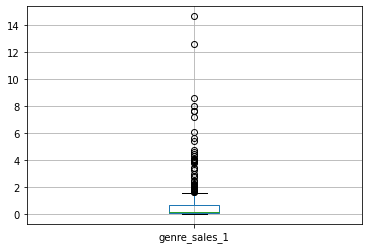

In [38]:
ac_t_PS4 = actual_table[(actual_table['platform'] == 'PS4')]
ac_t_PS4.boxplot('genre_sales_1')

<AxesSubplot:>

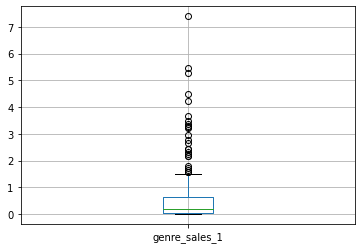

In [39]:
ac_t_XOne = actual_table[(actual_table['platform'] == 'XOne')]
ac_t_XOne.boxplot('genre_sales_1')

<AxesSubplot:>

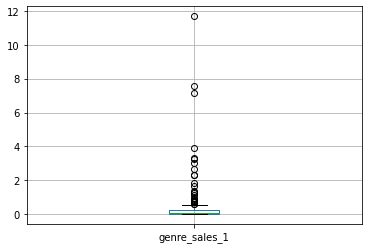

In [40]:
ac_t_3DS = actual_table[(actual_table['platform'] == '3DS')]
ac_t_3DS.boxplot('genre_sales_1')

<AxesSubplot:>

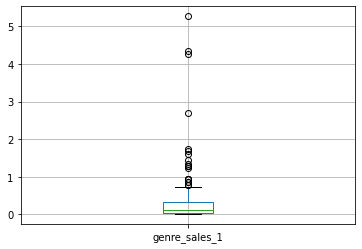

In [41]:
ac_t_PS3 = actual_table[(actual_table['platform'] == 'PS3')]
ac_t_PS3.boxplot('genre_sales_1')

<AxesSubplot:>

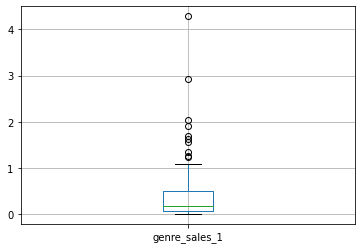

In [42]:
ac_t_X360 = actual_table[(actual_table['platform'] == 'X360')]
ac_t_X360.boxplot('genre_sales_1')

<AxesSubplot:>

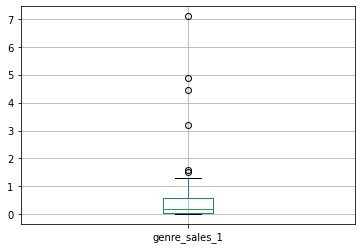

In [43]:
ac_t_WiiU = actual_table[(actual_table['platform'] == 'WiiU')]
ac_t_WiiU.boxplot('genre_sales_1')

<AxesSubplot:>

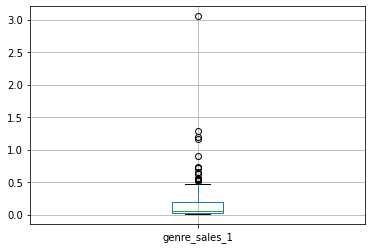

In [44]:
ac_t_PC = actual_table[(actual_table['platform'] == 'PC')]
ac_t_PC.boxplot('genre_sales_1')

<AxesSubplot:>

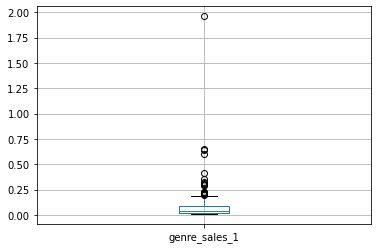

In [45]:
ac_t_PSV = actual_table[(actual_table['platform'] == 'PSV')]
ac_t_PSV.boxplot('genre_sales_1')

<AxesSubplot:>

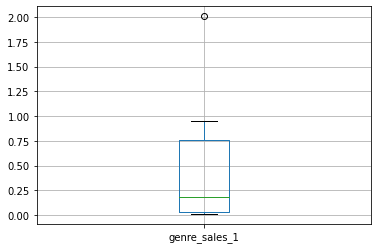

In [46]:
ac_t_Wii = actual_table[(actual_table['platform'] == 'Wii')]
ac_t_Wii.boxplot('genre_sales_1')

<AxesSubplot:>

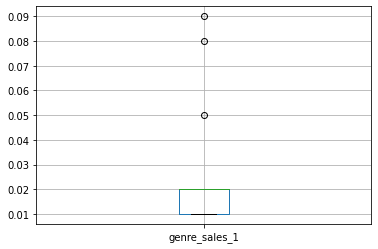

In [47]:
ac_t_PSP = actual_table[(actual_table['platform'] == 'PSP')]
ac_t_PSP.boxplot('genre_sales_1')

### Платформа PS4

In [48]:
table_2016 = data[(data['year_of_release'] == '2016') & (data['platform'] == 'PS4')]
table_2016
#Создадим новую таблицу с данными за 2016 год и платформой PS4

                                 name platform year_of_release         genre  \
94                            FIFA 17      PS4      2016-01-01        Sports   
171        Uncharted 4: A Thief's End      PS4      2016-01-01       Shooter   
245    Call of Duty: Infinite Warfare      PS4      2016-01-01       Shooter   
289                     Battlefield 1      PS4      2016-01-01       Shooter   
325         Tom Clancy's The Division      PS4      2016-01-01       Shooter   
...                               ...      ...             ...           ...   
16500                     Root Letter      PS4      2016-01-01     Adventure   
16503               Shin Hayarigami 2      PS4      2016-01-01     Adventure   
16526                      Dungeons 2      PS4      2016-01-01  Role-Playing   
16530         Carmageddon: Max Damage      PS4      2016-01-01        Action   
16585   Farming 2017 - The Simulation      PS4      2016-01-01    Simulation   

       na_sales  eu_sales  jp_sales  ot

<AxesSubplot:>

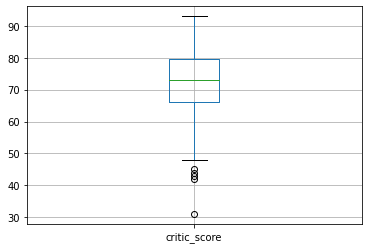

In [49]:
table_2016.boxplot('critic_score')
#Построим диаграмму рассеяния оценки критиков платформы PS4

<AxesSubplot:>

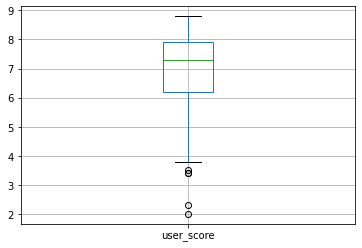

In [50]:
table_2016.boxplot('user_score')
#Построим диаграмму рассеяния оценки пользователей платформы PS4

In [51]:
table_2015 = data[(data['year_of_release'] == '2015') & (data['platform'] == 'PS4')]
table_2015
#Создадим новую таблицу с данными за 2015 год и платформой PS4

                                         name platform year_of_release  \
31                  Call of Duty: Black Ops 3      PS4      2015-01-01   
77                                    FIFA 16      PS4      2015-01-01   
87               Star Wars Battlefront (2015)      PS4      2015-01-01   
105                                 Fallout 4      PS4      2015-01-01   
231    Uncharted: The Nathan Drake Collection      PS4      2015-01-01   
...                                       ...      ...             ...   
15085                     Rugby League Live 3      PS4      2015-01-01   
15556   Natsuiro High School: Seishun Hakusho      PS4      2015-01-01   
15943                Professional Farmer 2016      PS4      2015-01-01   
16158                             Raven's Cry      PS4      2015-01-01   
16398                             Chaos;Child      PS4      2015-01-01   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31          Shooter      6.03  

<AxesSubplot:>

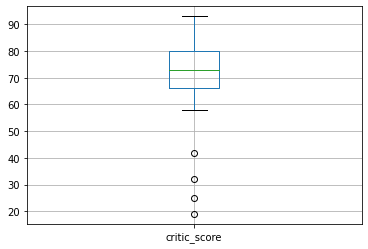

In [52]:
table_2015.boxplot('critic_score')
#Построим диаграмму рассеяния оценки критиков платформы PS4

<AxesSubplot:>

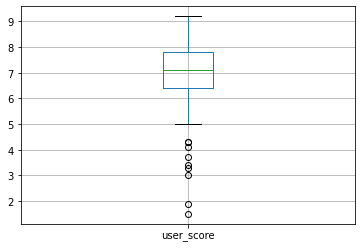

In [53]:
table_2015.boxplot('user_score')
#Построим диаграмму рассеяния оценки пользователей платформы PS4

In [54]:
table_2014 = data[(data['year_of_release'] == '2014') & (data['platform'] == 'PS4')]
table_2014
#Создадим новую таблицу с данными за 2014 год и платформой PS4

                                            name platform year_of_release  \
42                            Grand Theft Auto V      PS4      2014-01-01   
92                Call of Duty: Advanced Warfare      PS4      2014-01-01   
143                                      FIFA 15      PS4      2014-01-01   
154                                      Destiny      PS4      2014-01-01   
225                               The Last of Us      PS4      2014-01-01   
...                                          ...      ...             ...   
13597   Nobunaga's Ambition: Sphere of Influence      PS4      2014-01-01   
14159                      Infamous: First Light      PS4      2014-01-01   
14162                        Tour de France 2014      PS4      2014-01-01   
15047                              Omega Quintet      PS4      2014-01-01   
15762  Rabbids Invasion: The Interactive TV Show      PS4      2014-01-01   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_scor

<AxesSubplot:>

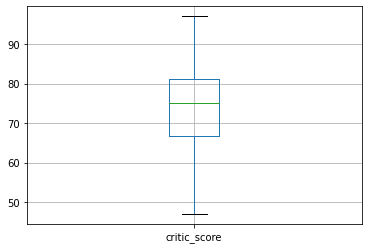

In [55]:
table_2014.boxplot('critic_score')
#Построим диаграмму рассеяния оценки критиков платформы PS4

<AxesSubplot:>

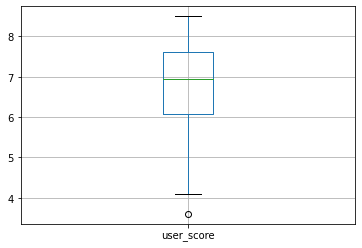

In [56]:
table_2014.boxplot('user_score')
#Построим диаграмму рассеяния оценки пользователей платформы PS4

# Расчёт зависимости

<AxesSubplot:xlabel='user_score', ylabel='genre_sales_1'>

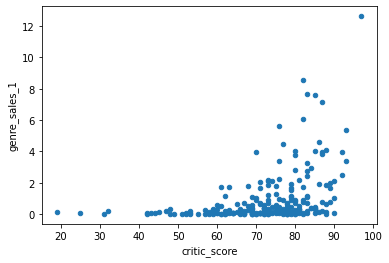

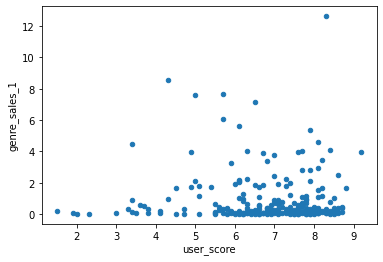

In [57]:
cor = actual_table.query('platform == "PS4"')
cor.plot(x='critic_score', y='genre_sales_1', kind='scatter') 
cor.plot(x='user_score', y='genre_sales_1', kind='scatter')

### Платформа XONE

In [58]:
table_2016_x = data[(data['year_of_release'] == '2016') & (data['platform'] == 'XOne')]
table_2016_x
#Создадим новую таблицу с данными за 2016 год и платформой XOne

                                                name platform year_of_release  \
571                                          FIFA 17     XOne      2016-01-01   
640                   Call of Duty: Infinite Warfare     XOne      2016-01-01   
709                                    Battlefield 1     XOne      2016-01-01   
758                        Tom Clancy's The Division     XOne      2016-01-01   
1439                                  Gears of War 4     XOne      2016-01-01   
...                                              ...      ...             ...   
16630                       Sébastien Loeb Rally Evo     XOne      2016-01-01   
16643                              Rugby Challenge 3     XOne      2016-01-01   
16645                                         ZombiU     XOne      2016-01-01   
16660                               Prison Architect     XOne      2016-01-01   
16672  Metal Gear Solid V: The Definitive Experience     XOne      2016-01-01   

         genre  na_sales  e

In [59]:
table_2015_x = data[(data['year_of_release'] == '2015') & (data['platform'] == 'XOne')]
table_2015_x
#Создадим новую таблицу с данными за 2015 год и платформой XOne

                                      name platform year_of_release  \
99               Call of Duty: Black Ops 3     XOne      2015-01-01   
242                      Halo 5: Guardians     XOne      2015-01-01   
270                              Fallout 4     XOne      2015-01-01   
342           Star Wars Battlefront (2015)     XOne      2015-01-01   
413         Gears of War: Ultimate Edition     XOne      2015-01-01   
...                                    ...      ...             ...   
15750         Back to the Future: The Game     XOne      2015-01-01   
15860  Broken Sword 5: The Serpent's Curse     XOne      2015-01-01   
16124  WRC 5: FIA World Rally Championship     XOne      2015-01-01   
16533                  Rugby League Live 3     XOne      2015-01-01   
16597          Saints Row: Gat out of Hell     XOne      2015-01-01   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
99          Shooter      4.59      2.11      0.01         0.68     

In [60]:
table_2014_x = data[(data['year_of_release'] == '2014') & (data['platform'] == 'XOne')]
table_2014_x
#Создадим новую таблицу с данными за 2014 год и платформой XOne

                                            name platform year_of_release  \
165                           Grand Theft Auto V     XOne      2014-01-01   
179               Call of Duty: Advanced Warfare     XOne      2014-01-01   
373                      Assassin's Creed: Unity     XOne      2014-01-01   
398                                      Destiny     XOne      2014-01-01   
422            Halo: The Master Chief Collection     XOne      2014-01-01   
...                                          ...      ...             ...   
13787                                   Terraria     XOne      2014-01-01   
13966                          Warriors Orochi 3     XOne      2014-01-01   
14478                              The Golf Club     XOne      2014-01-01   
16175                                Psycho-Pass     XOne      2014-01-01   
16595  Rabbids Invasion: The Interactive TV Show     XOne      2014-01-01   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  

# Расчёт зависимости

<AxesSubplot:xlabel='user_score', ylabel='genre_sales_1'>

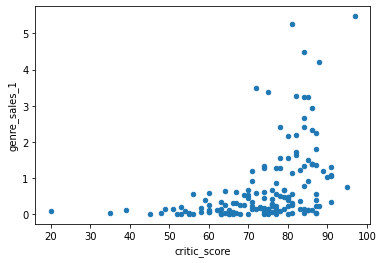

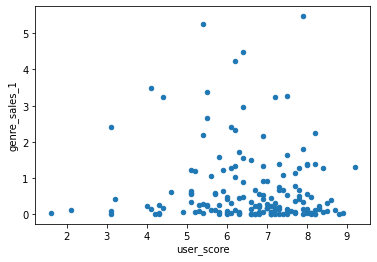

In [61]:
cor_5 = actual_table.query('platform == "XOne"')
cor_5.plot(x='critic_score', y='genre_sales_1', kind='scatter') 
cor_5.plot(x='user_score', y='genre_sales_1', kind='scatter')

### Подводя итог можно сказать что между отзывами критиков и пользователей наблюдается очень слабая зависимость

In [62]:
actual_table.groupby('genre').median().sort_values(by='genre_sales_1', ascending=False).head(5)

              na_sales  eu_sales  jp_sales  other_sales  critic_score  \
genre                                                                   
Shooter          0.220     0.220      0.00        0.055          78.0   
Sports           0.070     0.050      0.00        0.020          76.0   
Platform         0.075     0.055      0.00        0.020          78.0   
Fighting         0.040     0.020      0.03        0.010          71.0   
Role-Playing     0.020     0.010      0.05        0.010          75.0   

              user_score  rating  genre_sales_1  
genre                                            
Shooter             6.85     NaN          0.515  
Sports              5.50     NaN          0.180  
Platform            7.20     NaN          0.140  
Fighting            7.40     NaN          0.125  
Role-Playing        7.60     NaN          0.110  


Можно увидеть что в 2014-2016 гг наиболее популярные жанры были: Шутеры, спортивные игры, ролевые игры и рукопашный бой.

### Промежуточные выводы: я посмотрел, сколько игр выпускалось в разные годы, как менялись продажи по платформам. Выбрал платформы с наибольшими суммарными продажами. Взял за актуальный период данные  2014-2016 гг, посмотрел какие платформы лидируют по продажам. Построил график «ящик с усами» по глобальным продажам игр. Посмотрел, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построил диаграмму рассеяния и посчитал корреляцию между отзывами и продажами и распределил игры по жанрам.

# ШАГ 4

In [63]:
print('Самые популярные платформы американцев')
table_na_a = actual_table.pivot_table(index='platform', values = 'na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False)
print(table_na_a.head(5))
print('---------------------')

print('Самые популярные жанры американцев')
table_na_b = actual_table.pivot_table(index='genre', values = 'na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False)
print(table_na_b.head(5))
print('---------------------')

Самые популярные платформы американцев
          na_sales
platform          
PS4          98.61
XOne         81.27
X360         28.30
3DS          22.64
PS3          22.05
---------------------
Самые популярные жанры американцев
              na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05
---------------------


In [64]:
print('Самые популярные платформы европейцев')
table_eu_a = actual_table.pivot_table(index='platform', values = 'eu_sales', aggfunc=sum).sort_values(by='eu_sales', ascending=False)
print(table_eu_a.head(5))
print('---------------------')

print('Самые популярные жанры европейцев')
table_eu_b = actual_table.pivot_table(index='genre', values = 'eu_sales', aggfunc=sum).sort_values(by='eu_sales', ascending=False)
print(table_eu_b.head(5))
print('---------------------')

Самые популярные платформы европейцев
          eu_sales
platform          
PS4         130.04
XOne         46.25
PS3          25.54
PC           17.97
3DS          16.12
---------------------
Самые популярные жанры европейцев
              eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13
---------------------


In [65]:
print('Самые популярные платформы японцев')
table_jp_a = actual_table.pivot_table(index='platform', values = 'jp_sales', aggfunc=sum).sort_values(by='jp_sales', ascending=False)
print(table_jp_a.head(5))
print('---------------------')

print('Самые популярные жанры японцев')
table_jp_b = actual_table.pivot_table(index='genre', values = 'jp_sales', aggfunc=sum).sort_values(by='jp_sales', ascending=False)
print(table_jp_b.head(5))
print('---------------------')

Самые популярные платформы японцев
          jp_sales
platform          
3DS          44.24
PS4          15.02
PSV          14.54
PS3          11.22
WiiU          7.31
---------------------
Самые популярные жанры японцев
              jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87
---------------------


# ШАГ 5 

In [71]:
print('user_score_PC')
new_col = actual_table[(actual_table['platform'] == 'PC')]
table_pc = new_col[['user_score']]
print(table_pc)
print('------------------')

print('user_score_XOne')
new_col_6 = actual_table[(actual_table['platform'] == 'XOne')]
table_xone = new_col_6[['user_score']]
print(table_xone)

user_score_PC
       user_score
458           3.9
1530          5.4
1677          NaN
1730          7.9
2303          5.7
...           ...
16509         7.9
16518         1.4
16617         NaN
16631         NaN
16692         7.6

[151 rows x 1 columns]
------------------
user_score_XOne
       user_score
99            NaN
165           7.9
179           5.4
242           6.4
270           6.2
...           ...
16630         8.2
16643         6.6
16645         NaN
16660         6.7
16672         NaN

[228 rows x 1 columns]


### Проверим первую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Нулевая гипотеза: средние пользовательские рейтинги Xbox One = средним пользовательским рейтингам PC

### Альтернативная гипотеза: средние пользовательские рейтинги Xbox One не равны средним пользовательским рейтингам PC

In [77]:
from scipy import stats as st
import numpy as np

alpha = 0.05
result = st.ttest_ind(table_pc.dropna(), table_xone.dropna(), equal_var=False)
print('p-значение:', result.pvalue)

if result.pvalue < alpha or result.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [0.11601398]
Отвергаем нулевую гипотезу


In [73]:
print('user_score_Action')
new_col_a = actual_table[(actual_table['genre'] == 'Action')]
table_ac = new_col_a[['user_score']]
print(table_ac)
print('------------------')

print('user_score_Sports')
new_col_b = actual_table[(actual_table['genre'] == 'Sports')]
table_sp = new_col_b[['user_score']]
print(table_sp)

user_score_Action
       user_score
42            8.3
165           7.9
225           NaN
231           8.1
295           6.3
...           ...
16680         NaN
16691         NaN
16692         7.6
16699         NaN
16710         NaN

[619 rows x 1 columns]
------------------
user_score_Sports
       user_score
77            4.3
94            5.0
143           5.7
264           4.5
314           6.7
...           ...
16241         NaN
16428         NaN
16518         1.4
16638         NaN
16643         6.6

[161 rows x 1 columns]


### Проверим вторую гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные

### Нулевая гипотеза: средние пользовательские рейтинги Xbox One не равны средним пользовательским рейтингам PC

### Альтернативная гипотеза: средние пользовательские рейтинги Xbox One равны средним пользовательским рейтингам PC

In [78]:
alpha = 0.05
result_a = st.ttest_ind(table_ac.dropna(), table_sp.dropna(), equal_var=False)
print('p-значение:', result.pvalue)

if result.pvalue == alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [0.11601398]
Не получилось отвергнуть нулевую гипотезу


### Вывод: проверили гипотезы, по итогам которых был сделан вывод, что средние пользовательские рейтинги Xbox One не равны средним пользовательским рейтингам PC и средние пользовательские рейтинги Xbox One не равны средним пользовательским рейтингам PC.

# Общий вывод: в результате выполнения проекта заменены названия столбцов; были преобразованы данные в нужные типы, обработаны пропуски, посчитал суммарные продажи во всех регионах.

# Далее я провёл исследовательский анализ данных: посмотрел, сколько игр выпускалось в разные годы, как менялись продажи по платформам. Выбрал платформы с наибольшими суммарными продажами. 

# Определил, какие платформы лидируют по продажам. Построил график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

# Посмотрел, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построил диаграмму рассеяния и посчитал корреляцию между отзывами и продажами. 

# Определил для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Самые популярные жанры (топ-5).  

# Проверил гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

# В ходе анализа я сделал вывод, что нужно сделать упор на проиводство игр в жанре шутеров, так как по итогам 2014-2016 гг этот жанр был самым прибыльным, и к тому же самым распространёным среди игроков в Америке и Европе.